In [1]:
import pymongo

## CONNECT TO MONGO

In [2]:
from pymongo import MongoClient
client = MongoClient('localhost', 27017)

In [3]:
db = client.GoogleMaps

## GET A SAMPLE RECORD FROM MONGO DB

In [4]:
db.pois.find_one()


{'_id': ObjectId('5e50fc2ed60bc7dbb667ce84'),
 'formatted_address': 'Av. 10 de Novembro, 8, Maputo, Mozambique',
 'geometry': {'location': {'lat': -25.9801348, 'lng': 32.5794236},
  'viewport': {'northeast': {'lat': -25.97885527010728,
    'lng': 32.58074187989273},
   'southwest': {'lat': -25.98155492989272, 'lng': 32.57804222010728}}},
 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/restaurant-71.png',
 'id': 'f77e4320c4adb14d586e48a10d525f11768dbe77',
 'name': 'Zambi Restaurant',
 'opening_hours': {'open_now': True},
 'photos': [{'height': 1080,
   'html_attributions': ['<a href="https://maps.google.com/maps/contrib/104637042534005635385">Vitor Barata</a>'],
   'photo_reference': 'CmRaAAAA1ryFz19P2oUdZ33pe72Y7BQ_gJeiE9QDmVm03WUHeIqjvOywcn_ehCi3VE16sbWKhN5Zzwe88BxFUb4UvJpaRnzlyUvPlwlG2tobbUeOviEXOKAzutMrj7IhgdBZVcowEhA5hKqus-irkLR-bOvktTJOGhRJ9YhUWnWe0dijI22WFwB1jTUkCQ',
   'width': 1920}],
 'place_id': 'ChIJIwAeAQub5h4RnZZM5irEY48',
 'plus_code': {'compound_code': '2H9H+

## GET DATA FROM DB AND TRANSFORM INTO DESIRED FORMAT

In [220]:
names = []
ids = []
type_lists = []
densities = []
cursors = db.pois.find()
for cursor in cursors:
    #type_list.append(cursor.get("types"))
    #names.append(cursor.get("name"))
    #ids.append(cursor.get("id"))
    #densities.append(cursor.get("density"))
    types_of_poi = cursor.get("types")
    #print(types_of_poi)
    db_id=cursor.get("id")
    db_name=cursor.get("name")
    db_density=cursor.get("density")
    for type_l in types_of_poi:
        names.append(db_name)
        ids.append(db_id)
        type_lists.append(type_l)
        densities.append(db_density)


In [170]:
import pandas as pd
df = pd.DataFrame(list(zip(names, ids, type_lists, densities)), columns=['name','id','type_list','density'])
df.head()

,name,id,type_list,density
0,Zambi Restaurant,f77e4320c4adb14d586e48a10d525f11768dbe77,restaurant,"[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,..."
1,Zambi Restaurant,f77e4320c4adb14d586e48a10d525f11768dbe77,food,"[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,..."
2,Zambi Restaurant,f77e4320c4adb14d586e48a10d525f11768dbe77,point_of_interest,"[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,..."
3,Zambi Restaurant,f77e4320c4adb14d586e48a10d525f11768dbe77,establishment,"[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,..."
4,Dhow Maputo,f074f19d8d1ac004c8b30afe8c3722df58a37b6a,restaurant,"[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,..."


## EXTRACT POIS THAT CONTAIN POPULAR TIMES (DENSITY) INFO

In [175]:
df_density_notna = df[df.density.notna()]

In [176]:
df_density_notna.head()

,name,id,type_list,density
0,Zambi Restaurant,f77e4320c4adb14d586e48a10d525f11768dbe77,restaurant,"[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,..."
1,Zambi Restaurant,f77e4320c4adb14d586e48a10d525f11768dbe77,food,"[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,..."
2,Zambi Restaurant,f77e4320c4adb14d586e48a10d525f11768dbe77,point_of_interest,"[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,..."
3,Zambi Restaurant,f77e4320c4adb14d586e48a10d525f11768dbe77,establishment,"[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,..."
4,Dhow Maputo,f074f19d8d1ac004c8b30afe8c3722df58a37b6a,restaurant,"[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,..."


In [177]:
df_density_notna_restaurant = df_density_notna[df_density_notna.type_list=="restaurant"]
df_density_notna_restaurant.head()

,name,id,type_list,density
0,Zambi Restaurant,f77e4320c4adb14d586e48a10d525f11768dbe77,restaurant,"[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,..."
4,Dhow Maputo,f074f19d8d1ac004c8b30afe8c3722df58a37b6a,restaurant,"[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,..."
9,Campo Di Mare,17fecb5f6dab78ab6988e33624643e8d946d2dbd,restaurant,"[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,..."
13,A Nossa Tasca,006775267ce0910ef68c9bfdc56284e7dffec53a,restaurant,"[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,..."
17,Txhapo Txhapo Restaurante,7f2d8a36b7f0265c10eb6b00082ca9a98f91fdf8,restaurant,"[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,..."


In [178]:
df_density_notna_restaurant.shape

(50, 4)

In [179]:
df_density_notna_restaurant.name

0                                        Zambi Restaurant
4                                             Dhow Maputo
9                                           Campo Di Mare
13                                          A Nossa Tasca
17                              Txhapo Txhapo Restaurante
21                              Mundo's Maputo Mozambique
29                                               Botanica
33                                     Restaurante Sagres
37                                      Spazio Restaurant
41                                              Píri Píri
45                                             Bel Piatto
53                                     Maputo Water Front
62                               Restaurante Lugar e Meio
66                                          Flowers Field
78                               Galaxy Indian Restaurant
82                               Galaxy Indian Restaurant
86                        Kwetu (Restaurant & Craft shop)
90            

In [180]:
df_density_notna_restaurant.density

0       [{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...
4       [{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...
9       [{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...
13      [{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...
17      [{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...
21      [{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...
29      [{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...
33      [{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...
37      [{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...
41      [{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...
45      [{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...
53      [{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...
62      [{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...
66      [{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...
78      [{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...
82      [{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...
86      [{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...
90      [{'nam

## TRANSFORM AND PLOT HOURLY COMPARISON FOR A GIVEN LIST OF PLACES'

In [181]:
# HELPER FUNCTIONS TO PLOT WITH PARAMETERS
        
def filter_data_day(vals, day):
    for val in vals:
        if(val['name']==day):
            return val['data']

In [201]:
def hourly_trend_comparison_among_n_pois(df, type_list, poi_list, day):
    df_density_notna = df[(df.density.notna())&(df.type_list==type_list)]
    df_density_notna[day] = df_density_notna['density'].apply(filter_data_day, day=day)
    df_filtered = df_density_notna[["name",day]]
    #print(df_density_notna)
    names = []
    hours = []
    cnts = []

    for index, row in df_filtered.iterrows():
        for i in range(0, len(row[day])):
            names.append(row['name'])
            hours.append(str(i))
            cnts.append(row[day][i])
            
    df_final = pd.DataFrame(list(zip(names, hours, cnts)), columns=['names','hours','cnts'])
    df_plot = pd.DataFrame(columns=["names", "hours", "cnts"])
    for poi in poi_list:
        df_tmp = df_final[df_final["names"]==poi]
        df_plot = df_plot.append(df_tmp)
        #print(df_plot.shape)
    plot_comparative_temporal(df_plot, day)
    

In [218]:
def plot_comparative_temporal(df, title):
    #df.columns = ["3 Restaurants in Comparison", "hours", "cnts"]
    sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

    plt.figure(figsize=(15, 7))

    df.hours  = df.hours.astype(int)
    df.cnts  = df.cnts.astype(int)

    #print(df[df.names=="Zambi Restaurant"])
    l = sns.lineplot(x="hours", y="cnts", hue="names", data=df)
    l.axes.set_title(title,fontsize=30)
    l.set_xlabel("Hour of Day",fontsize=20)
    l.set_ylabel("Scaled Popularity",fontsize=20)
    l.tick_params(labelsize=15)
    plt.setp(l.get_legend().get_texts(), fontsize='20') # for legend text
    plt.setp(l.get_legend().get_title(), fontsize='32') # for legend title
    plt.savefig("/Users/emrecalisir/Desktop/Polimi/"+title+".png")

/Users/emrecalisir/anaconda3/envs/env_emre/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


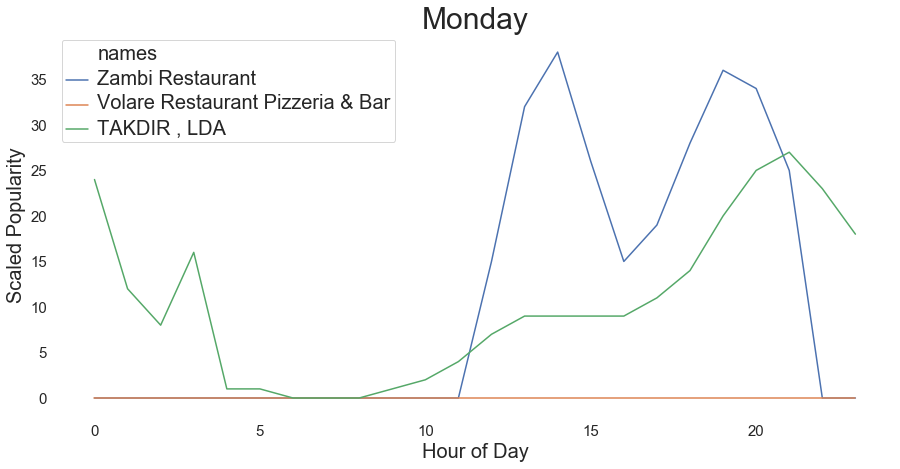

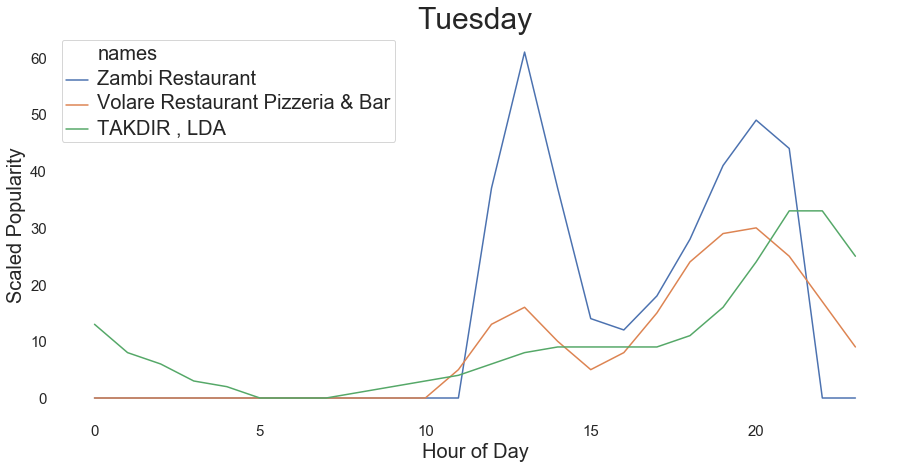

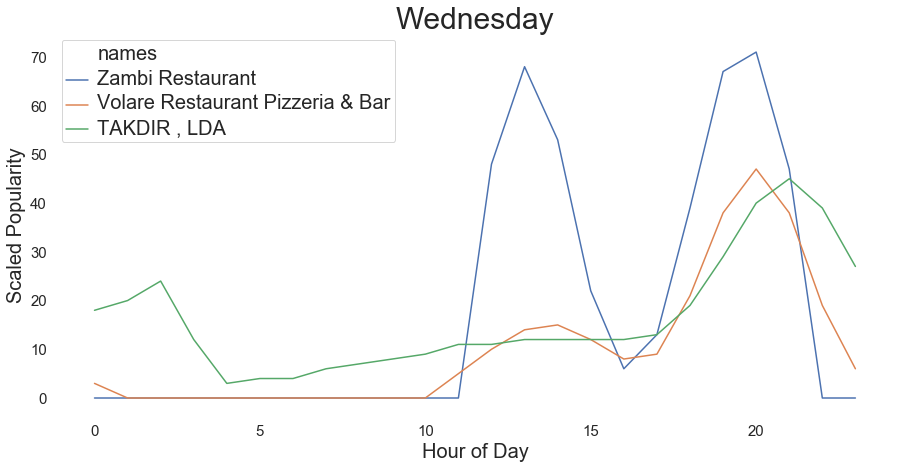

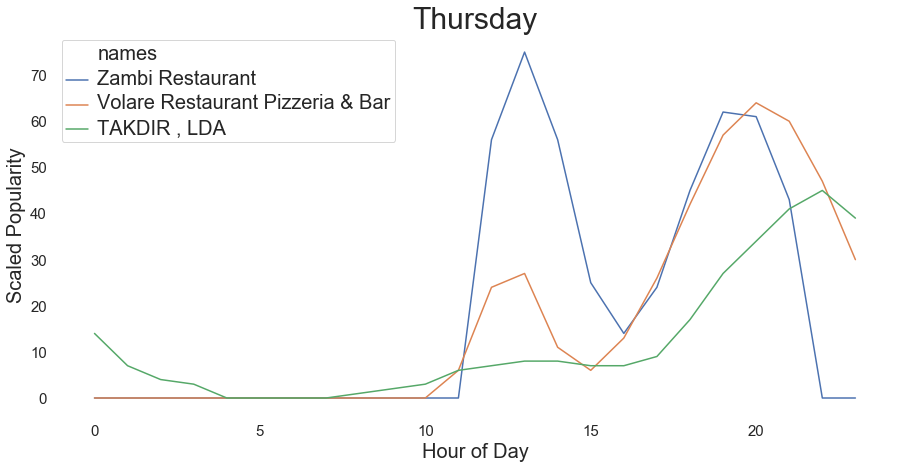

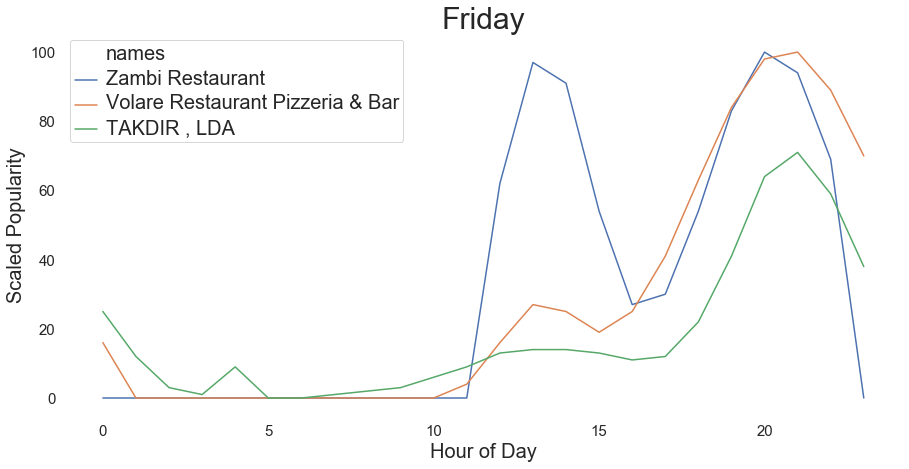

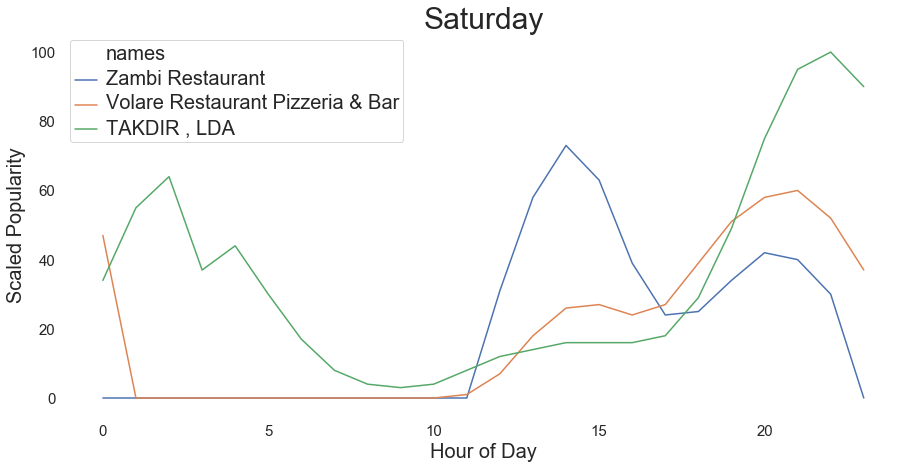

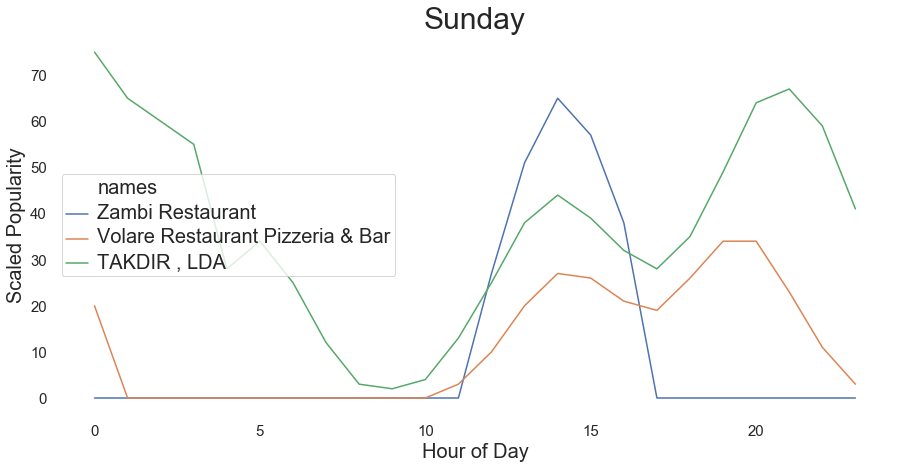

In [219]:
days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
poi_names = ["Zambi Restaurant", "Volare Restaurant Pizzeria & Bar", "TAKDIR , LDA"]
type_poi = "restaurant"
for day in days:
    hourly_trend_comparison_among_n_pois(df, type_poi, poi_names , day)